In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

from astropy import units as u
import astropy.coordinates as coord

In [2]:
dir = '/Users/paulzivick/Research/Gurtina_Project/'


#### Set assumed center coordinates for the SMC
#### Then transform into Galactocentric frame

smcra, smcdec, smcdist, smcpmra, smcpmdec, smcvrad = 13.04, -73.10, 60.6, 0.67, -1.20, 148.0

c = coord.SkyCoord(ra=smcra*u.degree, dec=smcdec*u.degree, distance=smcdist*u.kpc, \
                   pm_ra_cosdec=smcpmra*u.mas/u.yr, pm_dec=smcpmdec*u.mas/u.yr, \
                   radial_velocity=smcvrad*u.km/u.s, frame='icrs')

print(c.transform_to(coord.Galactocentric(galcen_distance=8.1*u.kpc))) 

c2 = c.transform_to(coord.Galactocentric(galcen_distance=8.1*u.kpc))

smc_center = np.asarray([c2.x.value, c2.y.value, c2.z.value, c2.v_x.value, c2.v_y.value, c2.v_z.value])

print(smc_center)
print(np.sqrt(smc_center[0]**2 + smc_center[1]**2 + smc_center[2]**2))
print(np.sqrt(smc_center[3]**2 + smc_center[4]**2 + smc_center[5]**2))


#### Check that it works going back the other way

test = coord.SkyCoord(x = smc_center[0] * u.kpc, y = smc_center[1] * u.kpc, z = smc_center[2] * u.kpc, \
                       v_x = smc_center[3] * u.km/u.s, v_y = smc_center[4] * u.km/u.s, \
                       v_z = smc_center[5] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
testb = test.transform_to(coord.ICRS)

print(testb)

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.1 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in kpc
    (15.4001422, -36.60024474, -42.16929743)
 (v_x, v_y, v_z) in km / s
    (39.04902885, -162.54103604, 152.69137299)>
[  15.4001422   -36.60024474  -42.16929743   39.04902885 -162.54103604
  152.69137299]
57.92229225678382
226.40466080595402
<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (13.04, -73.1, 60.6)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (0.67, -1.2, 148.)>


<Figure size 432x288 with 0 Axes>

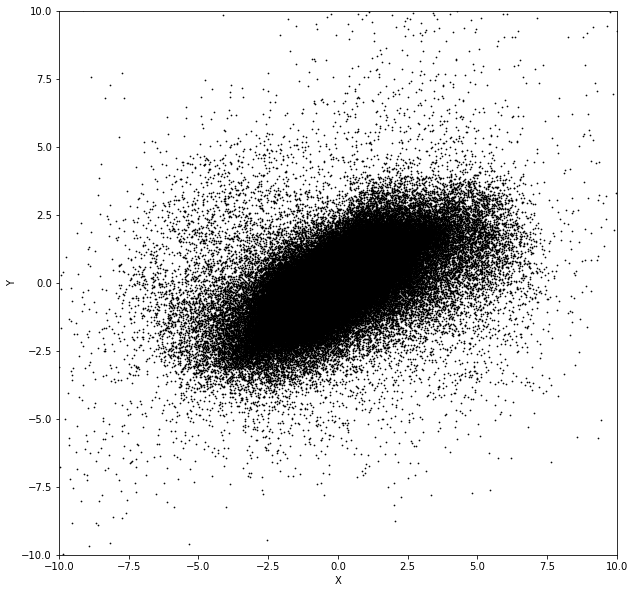

<Figure size 432x288 with 0 Axes>

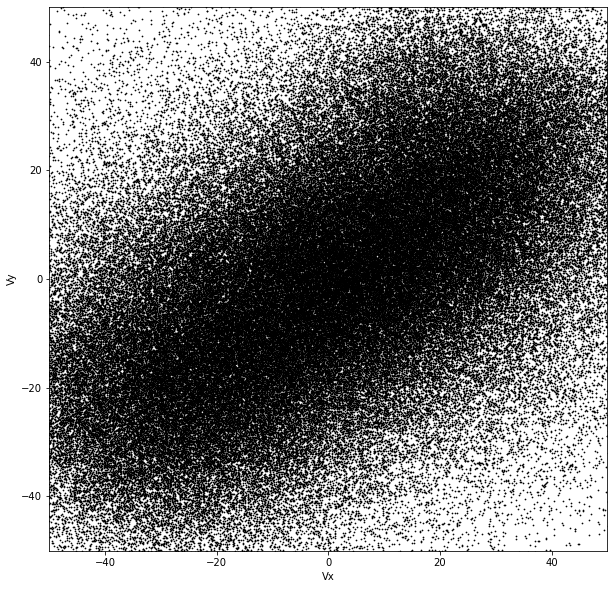

In [3]:
# Load in Model 1 data

smc1filebase = dir + 'Data/SMC_Model1/SMC_Stars' 

smc1age = np.loadtxt(smc1filebase + 'Age_Model1.txt')
smc1age.shape = (len(smc1age), 1)

smc1pos = np.loadtxt(smc1filebase + 'Pos_Model1_orig.txt')
smc1vel = np.loadtxt(smc1filebase + 'Vel_Model1_orig.txt')

smc1_orig = np.hstack((smc1age, smc1pos, smc1vel))

smc1 = Table(data=smc1_orig, names=['Age', 'X_0', 'Y_0', 'Z_0', 'Vx_0', 'Vy_0', 'Vz_0'])


smc1gaspos = np.loadtxt(dir + "Data/SMC_Model1/SMC_Gas_Pos_Model1_orig.txt")
smc1gasvel = np.loadtxt(dir + "Data/SMC_Model1/SMC_Gas_Vel_Model1_orig.txt")

smc1gas_orig = np.hstack((smc1gaspos, smc1gasvel))
smc1gas = Table(data=smc1gas_orig, names=['X_0', 'Y_0', 'Z_0', 'Vx_0', 'Vy_0', 'Vz_0'])


smc1dm_orig = np.loadtxt(dir + "Data/SMC_DM_Model1.txt")
smc1dm = Table(data=smc1dm_orig, names=['Mass', 'X_0', 'Y_0', 'Z_0', 'Vx_0', 'Vy_0', 'Vz_0'])


smc1_center = np.asarray([18.0, -45.7, -40.0, -87.8, -384.0, 245.6])
x, y, z, vx, vy, vz = 0, 1, 2, 3, 4, 5

smc1_diff = smc_center - smc1_center


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter((smc1['X_0'] - smc1_center[x]), (smc1['Y_0'] - smc1_center[y]), s=2, marker='.', color='black')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter((smc1['Vx_0'] - smc1_center[vx]), (smc1['Vy_0'] - smc1_center[vy]), s=2, marker='.', color='black')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_xlabel("Vx")
ax.set_ylabel("Vy")
plt.show()

try:
    smc1.add_column((smc1['X_0'] + smc1_diff[x]), name='X_G')
    smc1.add_column((smc1['Y_0'] + smc1_diff[y]), name='Y_G')
    smc1.add_column((smc1['Z_0'] + smc1_diff[z]), name='Z_G')
    smc1.add_column((smc1['Vx_0'] + smc1_diff[vx]), name='Vx_G')
    smc1.add_column((smc1['Vy_0'] + smc1_diff[vy]), name='Vy_G')
    smc1.add_column((smc1['Vz_0'] + smc1_diff[vz]), name='Vz_G')
    
except ValueError:
    print("You already added these columns for SMC Model 2.")


try:
    smc1gas.add_column((smc1gas['X_0'] + smc1_diff[x]), name="X_G")
    smc1gas.add_column((smc1gas['Y_0'] + smc1_diff[y]), name="Y_G")
    smc1gas.add_column((smc1gas['Z_0'] + smc1_diff[z]), name="Z_G")
    smc1gas.add_column((smc1gas['Vx_0'] + smc1_diff[vx]), name="Vx_G")
    smc1gas.add_column((smc1gas['Vy_0'] + smc1_diff[vy]), name="Vy_G")
    smc1gas.add_column((smc1gas['Vz_0'] + smc1_diff[vz]), name="Vz_G")
    
except ValueError:
    print("You already added these columns for SMC Model 1 Gas.")
    
    
try:
    smc1dm.add_column((smc1dm['X_0'] + smc1_diff[x]), name="X_G")
    smc1dm.add_column((smc1dm['Y_0'] + smc1_diff[y]), name="Y_G")
    smc1dm.add_column((smc1dm['Z_0'] + smc1_diff[z]), name="Z_G")
    smc1dm.add_column((smc1dm['Vx_0'] + smc1_diff[vx]), name="Vx_G")
    smc1dm.add_column((smc1dm['Vy_0'] + smc1_diff[vy]), name="Vy_G")
    smc1dm.add_column((smc1dm['Vz_0'] + smc1_diff[vz]), name="Vz_G")
    
except ValueError:
    print("You already added these columns for SMC Model 1 DM.")

<Figure size 432x288 with 0 Axes>

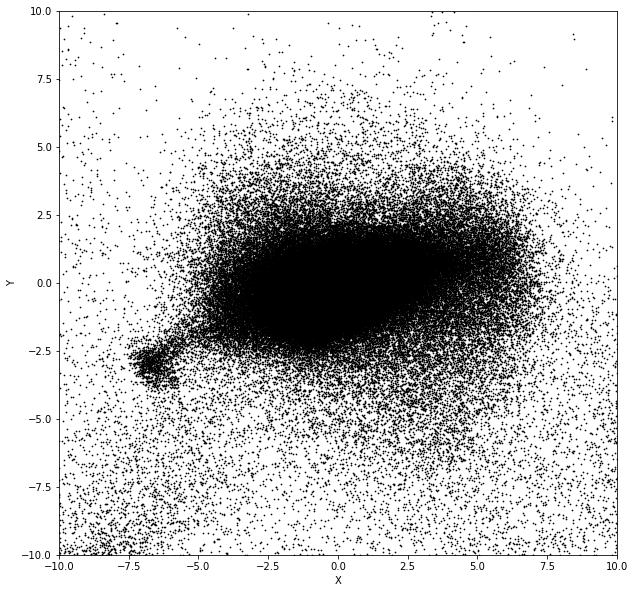

<Figure size 432x288 with 0 Axes>

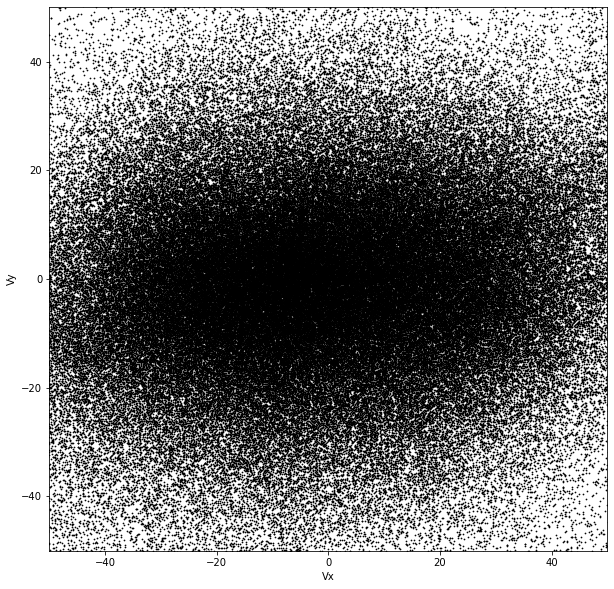

In [4]:
# Load in Model 2 data

smc2filebase = dir + 'Data/SMC_Model2/SMC_Stars' 

smc2age = np.loadtxt(smc2filebase + 'Age_Model2.txt')
smc2age.shape = (len(smc2age), 1)

smc2pos = np.loadtxt(smc2filebase + 'Pos_Model2_orig.txt')
smc2vel = np.loadtxt(smc2filebase + 'Vel_Model2_orig.txt')

smc2_orig = np.hstack((smc2age, smc2pos, smc2vel))

smc2 = Table(data=smc2_orig, names=['Age', 'X_0', 'Y_0', 'Z_0', 'Vx_0', 'Vy_0', 'Vz_0'])

### now do the same for the gas particles

smc2gaspos = np.loadtxt(dir + "Data/SMC_Model2/SMC_Gas_Pos_Model2_orig.txt")
smc2gasvel = np.loadtxt(dir + "Data/SMC_Model2/SMC_Gas_Vel_Model2_orig.txt")

smc2gas_orig = np.hstack((smc2gaspos, smc2gasvel))
smc2gas = Table(data=smc2gas_orig, names=['X_0', 'Y_0', 'Z_0', 'Vx_0', 'Vy_0', 'Vz_0'])


smc2dm_orig = np.loadtxt(dir + "Data/SMC_DM_Model2.txt")
smc2dm = Table(data=smc2dm_orig, names=['Mass', 'X_0', 'Y_0', 'Z_0', 'Vx_0', 'Vy_0', 'Vz_0'])

### 

smc2_center = np.asarray([5.5, -35.1, -39.2, -66.1680, -257.657, 197.569])

smc2_diff = smc_center - smc2_center


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter((smc2['X_0'] - smc2_center[x]), (smc2['Y_0'] - smc2_center[y]), s=2, marker='.', color='black')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter((smc2['Vx_0'] - smc2_center[vx]), (smc2['Vy_0'] - smc2_center[vy]), s=2, marker='.', color='black')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_xlabel("Vx")
ax.set_ylabel("Vy")
plt.show()



try:
    smc2.add_column((smc2['X_0'] + smc2_diff[x]), name='X_G')
    smc2.add_column((smc2['Y_0'] + smc2_diff[y]), name='Y_G')
    smc2.add_column((smc2['Z_0'] + smc2_diff[z]), name='Z_G')
    smc2.add_column((smc2['Vx_0'] + smc2_diff[vx]), name='Vx_G')
    smc2.add_column((smc2['Vy_0'] + smc2_diff[vy]), name='Vy_G')
    smc2.add_column((smc2['Vz_0'] + smc2_diff[vz]), name='Vz_G')
    
except ValueError:
    print("You already added these columns for SMC Model 2.")
    
    
try:
    smc2gas.add_column((smc2gas['X_0'] + smc2_diff[x]), name="X_G")
    smc2gas.add_column((smc2gas['Y_0'] + smc2_diff[y]), name="Y_G")
    smc2gas.add_column((smc2gas['Z_0'] + smc2_diff[z]), name="Z_G")
    smc2gas.add_column((smc2gas['Vx_0'] + smc2_diff[vx]), name="Vx_G")
    smc2gas.add_column((smc2gas['Vy_0'] + smc2_diff[vy]), name="Vy_G")
    smc2gas.add_column((smc2gas['Vz_0'] + smc2_diff[vz]), name="Vz_G")
    
except ValueError:
    print("You already added these columns for SMC Model 2 Gas.")
    
    
try:
    smc2dm.add_column((smc2dm['X_0'] + smc2_diff[x]), name="X_G")
    smc2dm.add_column((smc2dm['Y_0'] + smc2_diff[y]), name="Y_G")
    smc2dm.add_column((smc2dm['Z_0'] + smc2_diff[z]), name="Z_G")
    smc2dm.add_column((smc2dm['Vx_0'] + smc2_diff[vx]), name="Vx_G")
    smc2dm.add_column((smc2dm['Vy_0'] + smc2_diff[vy]), name="Vy_G")
    smc2dm.add_column((smc2dm['Vz_0'] + smc2_diff[vz]), name="Vz_G")
    
except ValueError:
    print("You already added these columns for SMC Model 2 DM.")

Now we're going to double check that the coordinates check out the way I expect. So we'll start by taking the known position of the SMC and convert that into Galactocentric coordinates.

You already added these columns for SMC Model 1.


<Figure size 432x288 with 0 Axes>

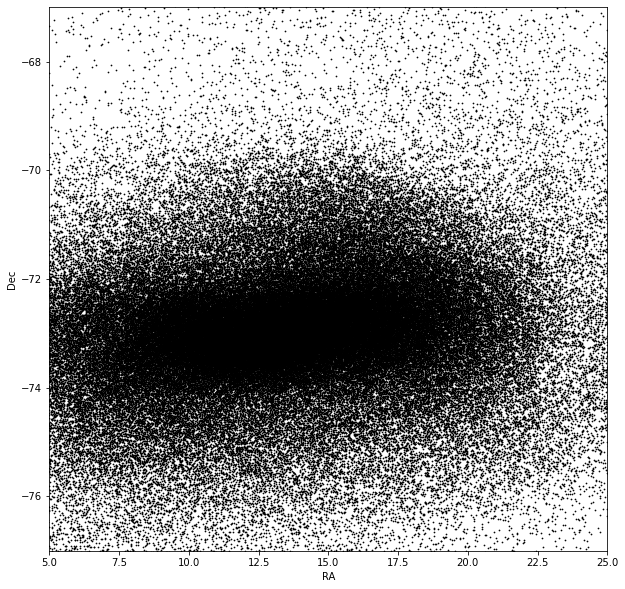

<Figure size 432x288 with 0 Axes>

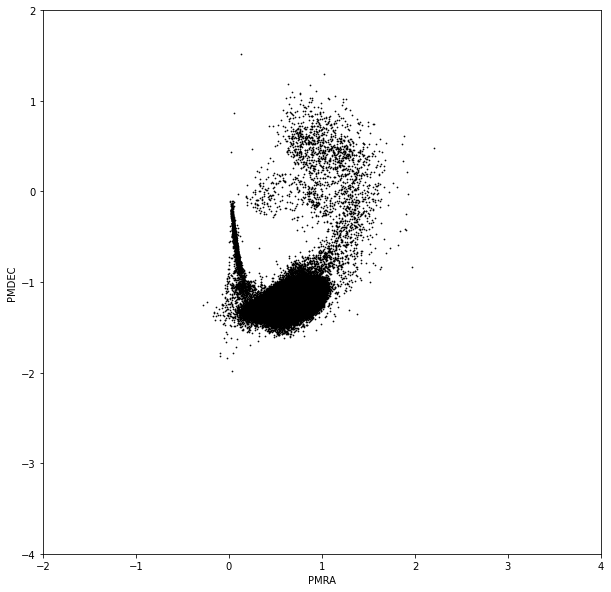

<Figure size 432x288 with 0 Axes>

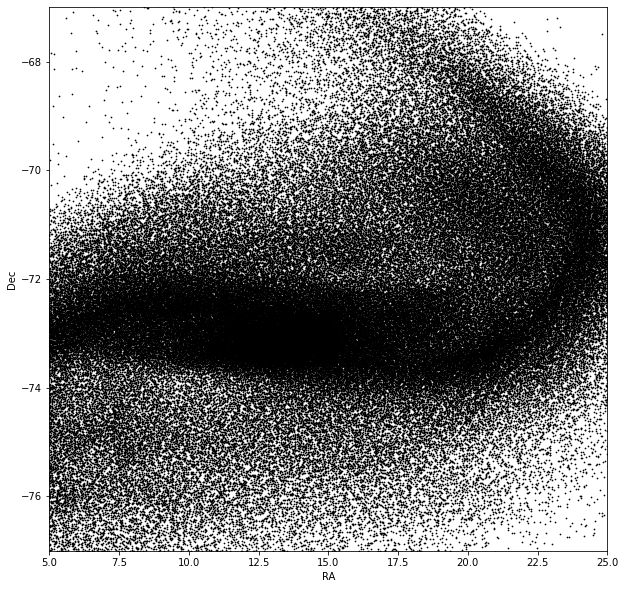

<Figure size 432x288 with 0 Axes>

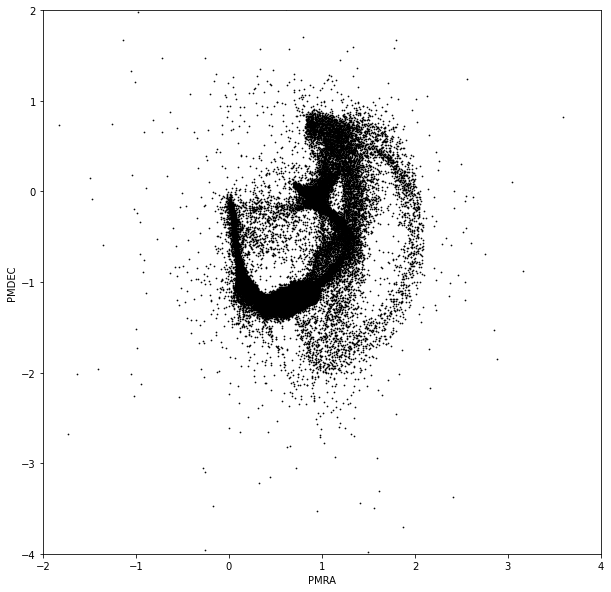

In [6]:
temp1a = coord.SkyCoord(x = smc1['X_G'] * u.kpc, y = smc1['Y_G'] * u.kpc, z = smc1['Z_G'] * u.kpc, \
                       v_x = smc1['Vx_G'] * u.km/u.s, v_y = smc1['Vy_G'] * u.km/u.s, \
                       v_z = smc1['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
temp1b = temp1a.transform_to(coord.ICRS)

try:
    smc1.add_column(temp1b.ra.value, name='RA')
    smc1.add_column(temp1b.dec.value, name='DEC')
    smc1.add_column(temp1b.distance.value, name='Dist')
    smc1.add_column(temp1b.pm_ra_cosdec.value, name='PMRA')
    smc1.add_column(temp1b.pm_dec.value, name='PMDEC')
    smc1.add_column(temp1b.radial_velocity.value, name='RV')
    
except ValueError:
    print("You already added these columns for SMC Model 1.")

smc1.write(dir + "Data/allstar_Model1.fits", overwrite=True)


### now do the same for the gas

temp1c = coord.SkyCoord(x = smc1gas['X_G'] * u.kpc, y = smc1gas['Y_G'] * u.kpc, z = smc1gas['Z_G'] * u.kpc, \
                       v_x = smc1gas['Vx_G'] * u.km/u.s, v_y = smc1gas['Vy_G'] * u.km/u.s, \
                       v_z = smc1gas['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
temp1d = temp1c.transform_to(coord.ICRS)

try:
    smc1gas.add_column(temp1d.ra.value, name='RA')
    smc1gas.add_column(temp1d.dec.value, name='DEC')
    smc1gas.add_column(temp1d.distance.value, name='Dist')
    smc1gas.add_column(temp1d.pm_ra_cosdec.value, name='PMRA')
    smc1gas.add_column(temp1d.pm_dec.value, name='PMDEC')
    smc1gas.add_column(temp1d.radial_velocity.value, name='RV')
    
except ValueError:
    print("You already added these columns for SMC Model 1 Gas.")

smc1gas.write(dir + "Data/allstar_Model1_Gas.fits", overwrite=True)



### now do the same for the DM

temp1e = coord.SkyCoord(x = smc1dm['X_G'] * u.kpc, y = smc1dm['Y_G'] * u.kpc, z = smc1dm['Z_G'] * u.kpc, \
                       v_x = smc1dm['Vx_G'] * u.km/u.s, v_y = smc1dm['Vy_G'] * u.km/u.s, \
                       v_z = smc1dm['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
temp1f = temp1e.transform_to(coord.ICRS)

try:
    smc1dm.add_column(temp1f.ra.value, name='RA')
    smc1dm.add_column(temp1f.dec.value, name='DEC')
    smc1dm.add_column(temp1f.distance.value, name='Dist')
    smc1dm.add_column(temp1f.pm_ra_cosdec.value, name='PMRA')
    smc1dm.add_column(temp1f.pm_dec.value, name='PMDEC')
    smc1dm.add_column(temp1f.radial_velocity.value, name='RV')
    
except ValueError:
    print("You already added these columns for SMC Model 1 DM.")

smc1dm.write(dir + "Data/allstar_Model1_DM.fits", overwrite=True)



####
    
    
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smc1['RA'], smc1['DEC'], s=2, marker='.', color='black')
ax.set_xlim(5, 25)
ax.set_ylim(-77, -67)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smc1['PMRA'], smc1['PMDEC'], s=2, marker='.', color='black')
ax.set_xlim(-2, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
plt.show()


####
    
    
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smc1gas['RA'], smc1gas['DEC'], s=2, marker='.', color='black')
ax.set_xlim(5, 25)
ax.set_ylim(-77, -67)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smc1gas['PMRA'], smc1gas['PMDEC'], s=2, marker='.', color='black')
ax.set_xlim(-2, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
plt.show()

In [7]:
####

temp2a = coord.SkyCoord(x = smc2['X_G'] * u.kpc, y = smc2['Y_G'] * u.kpc, z = smc2['Z_G'] * u.kpc, \
                       v_x = smc2['Vx_G'] * u.km/u.s, v_y = smc2['Vy_G'] * u.km/u.s, \
                       v_z = smc2['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp2.transform_to(coord.ICRS))
temp2b = temp2a.transform_to(coord.ICRS)

try:
    smc2.add_column(temp2b.ra.value, name='RA')
    smc2.add_column(temp2b.dec.value, name='DEC')
    smc2.add_column(temp2b.distance.value, name='Dist')
    smc2.add_column(temp2b.pm_ra_cosdec.value, name='PMRA')
    smc2.add_column(temp2b.pm_dec.value, name='PMDEC')
    smc2.add_column(temp2b.radial_velocity.value, name='RV')
    
except ValueError:
    print("You already added these columns for SMC Model 2.")
    
smc2.write(dir + "Data/allstar_Model2.fits", overwrite=True)


#### now for the gas

temp2c = coord.SkyCoord(x = smc2gas['X_G'] * u.kpc, y = smc2gas['Y_G'] * u.kpc, z = smc2gas['Z_G'] * u.kpc, \
                       v_x = smc2gas['Vx_G'] * u.km/u.s, v_y = smc2gas['Vy_G'] * u.km/u.s, \
                       v_z = smc2gas['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp2.transform_to(coord.ICRS))
temp2d = temp2c.transform_to(coord.ICRS)

try:
    smc2gas.add_column(temp2d.ra.value, name='RA')
    smc2gas.add_column(temp2d.dec.value, name='DEC')
    smc2gas.add_column(temp2d.distance.value, name='Dist')
    smc2gas.add_column(temp2d.pm_ra_cosdec.value, name='PMRA')
    smc2gas.add_column(temp2d.pm_dec.value, name='PMDEC')
    smc2gas.add_column(temp2d.radial_velocity.value, name='RV')
    
except ValueError:
    print("You already added these columns for SMC Model 2 Gas.")
    
smc2gas.write(dir + "Data/allstar_Model2_Gas.fits", overwrite=True)



### now do the same for the DM

temp1e = coord.SkyCoord(x = smc2dm['X_G'] * u.kpc, y = smc2dm['Y_G'] * u.kpc, z = smc2dm['Z_G'] * u.kpc, \
                       v_x = smc2dm['Vx_G'] * u.km/u.s, v_y = smc2dm['Vy_G'] * u.km/u.s, \
                       v_z = smc2dm['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
temp1f = temp1e.transform_to(coord.ICRS)

try:
    smc2dm.add_column(temp1f.ra.value, name='RA')
    smc2dm.add_column(temp1f.dec.value, name='DEC')
    smc2dm.add_column(temp1f.distance.value, name='Dist')
    smc2dm.add_column(temp1f.pm_ra_cosdec.value, name='PMRA')
    smc2dm.add_column(temp1f.pm_dec.value, name='PMDEC')
    smc2dm.add_column(temp1f.radial_velocity.value, name='RV')
    
except ValueError:
    print("You already added these columns for SMC Model 2 DM.")

smc2dm.write(dir + "Data/allstar_Model2_DM.fits", overwrite=True)


<Figure size 432x288 with 0 Axes>

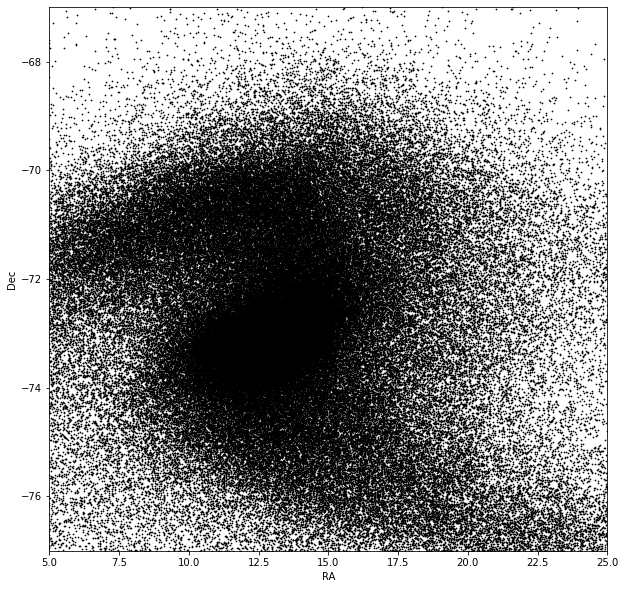

<Figure size 432x288 with 0 Axes>

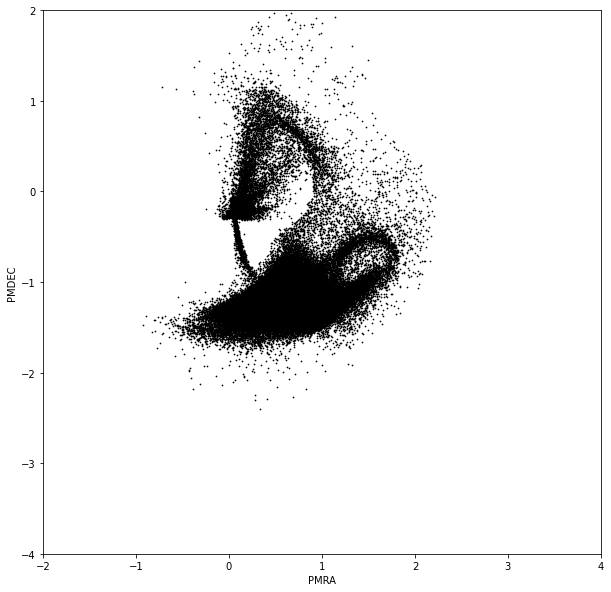

<Figure size 432x288 with 0 Axes>

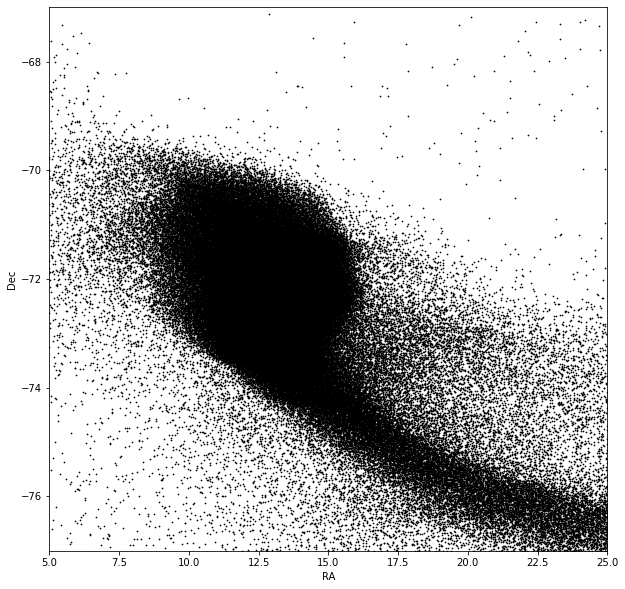

<Figure size 432x288 with 0 Axes>

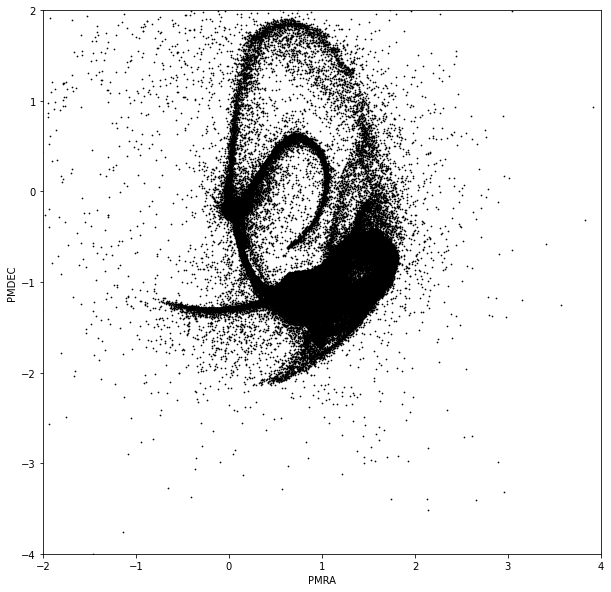

In [8]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smc2['RA'], smc2['DEC'], s=2, marker='.', color='black')
ax.set_xlim(5, 25)
ax.set_ylim(-77, -67)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smc2['PMRA'], smc2['PMDEC'], s=2, marker='.', color='black')
ax.set_xlim(-2, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
plt.show()


####

plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smc2gas['RA'], smc2gas['DEC'], s=2, marker='.', color='black')
ax.set_xlim(5, 25)
ax.set_ylim(-77, -67)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smc2gas['PMRA'], smc2gas['PMDEC'], s=2, marker='.', color='black')
ax.set_xlim(-2, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
plt.show()